Question 18
---

In [1]:
library(igraph)

filenames = list.files('./gplus')

ids <- lapply(strsplit(filenames, "[.]"), "[",1)
idds <- unique(unlist(ids))
k = 0
for(id in idds){
    filename <- paste('./gplus/',id,'.circles',sep = "")
    circles <- file(filename, 'r')
    circle_lines <- readLines(circles)
    if(length(circle_lines)>2){
        k = k + 1
    }    
}

print (paste('Number of personal networks with more than 2 circles:', k))




Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] "Number of personal networks with more than 2 circles: 57"


Question 19
---

In [2]:
library(igraph)

In [3]:
createnet <- function(node_id ){
        filename <- paste('./gplus/',node_id,'.edges',sep = "")
        print(filename)
        g <- read.graph(filename,format = 'ncol', directed=TRUE)
        g <- add_vertices(g, nv=1, name = node_id)
        new_edges = c()
        for (id in 1:(vcount(g)-1)){
            new_edges <- c(new_edges, c(vcount(g), id))
        }
        
        #print(vcount(g))
        g <- add_edges(g, new_edges)    
        return (g)
}

distribution <- function(graph){
    plot(degree_distribution(graph,  mode = 'in'))
    plot(degree_distribution(graph,  mode = 'out'))
    
}


[1] "./gplus/109327480479767108490.edges"


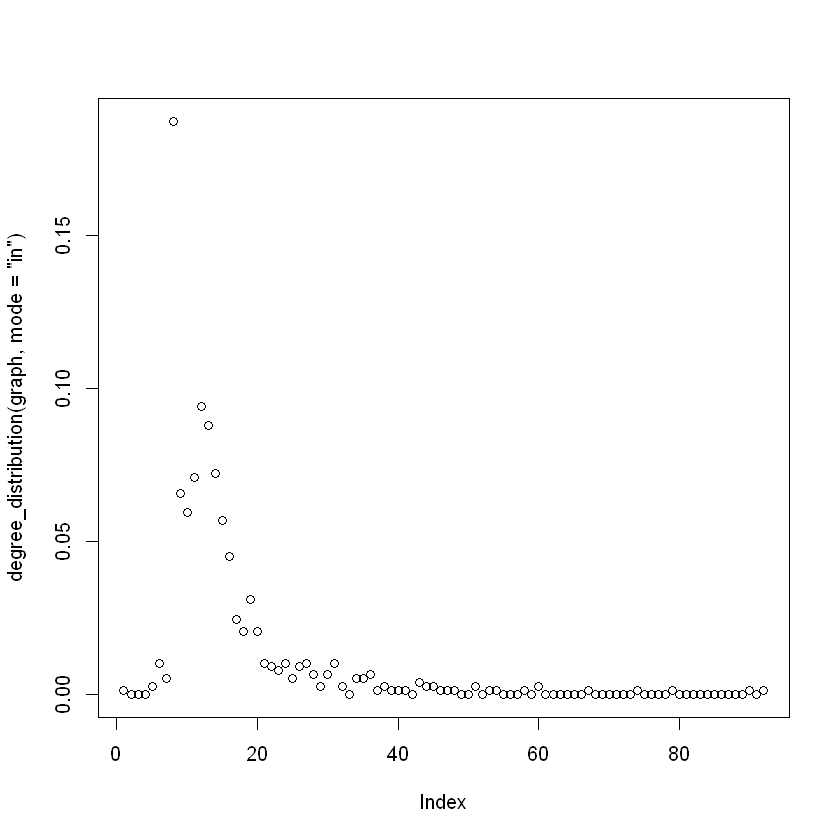

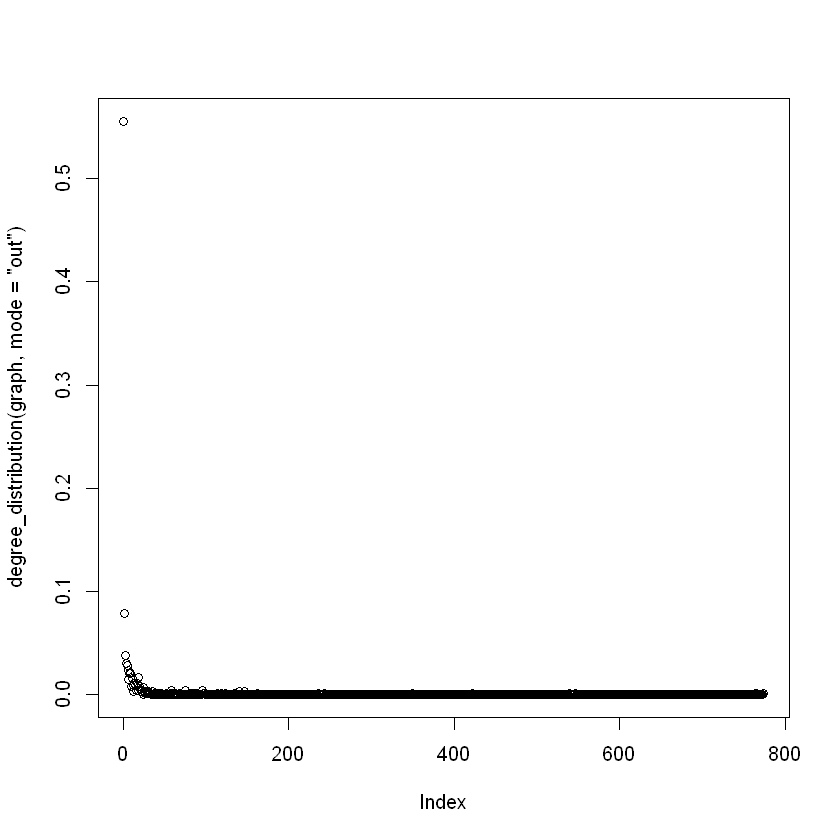

In [4]:
g <- createnet(node_id = '109327480479767108490')
distribution(g)

[1] "./gplus/115625564993990145546.edges"


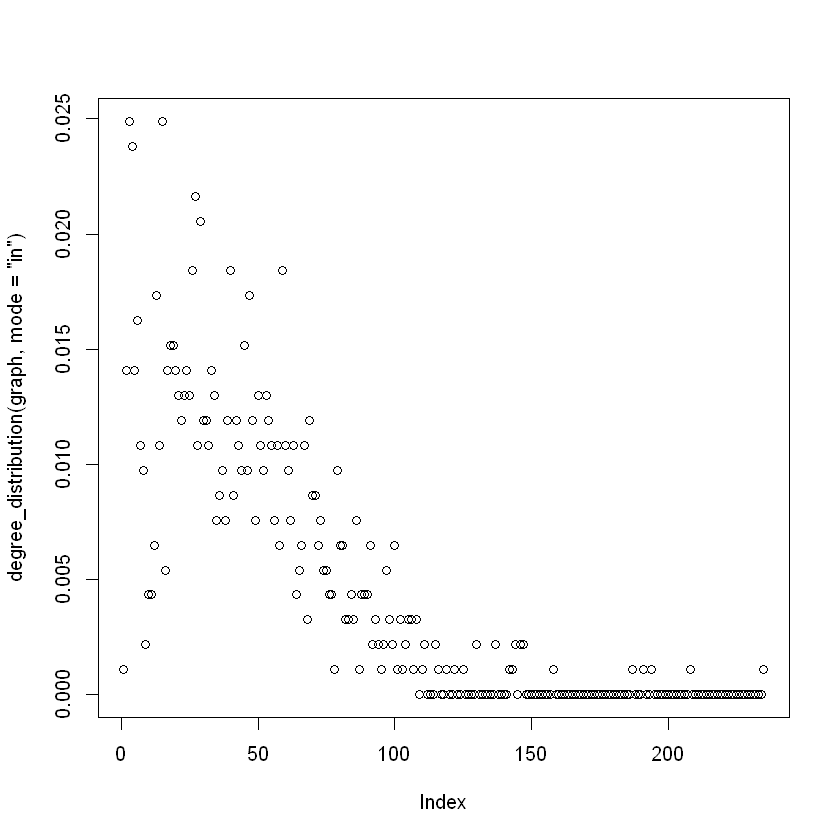

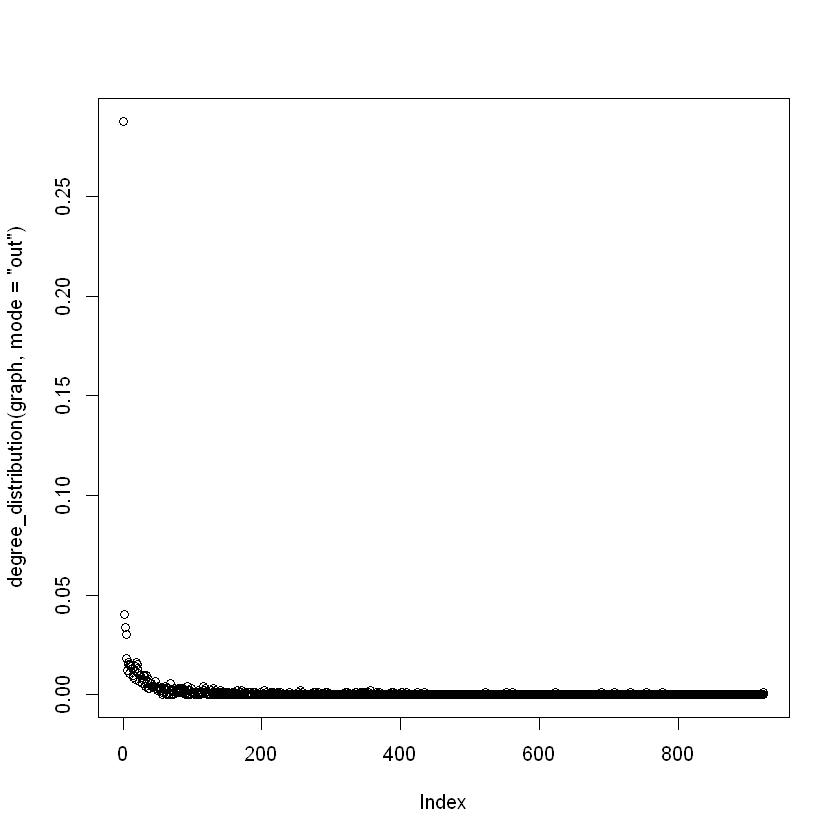

In [5]:
g <- createnet(node_id = '115625564993990145546')
distribution(g)

[1] "./gplus/101373961279443806744.edges"


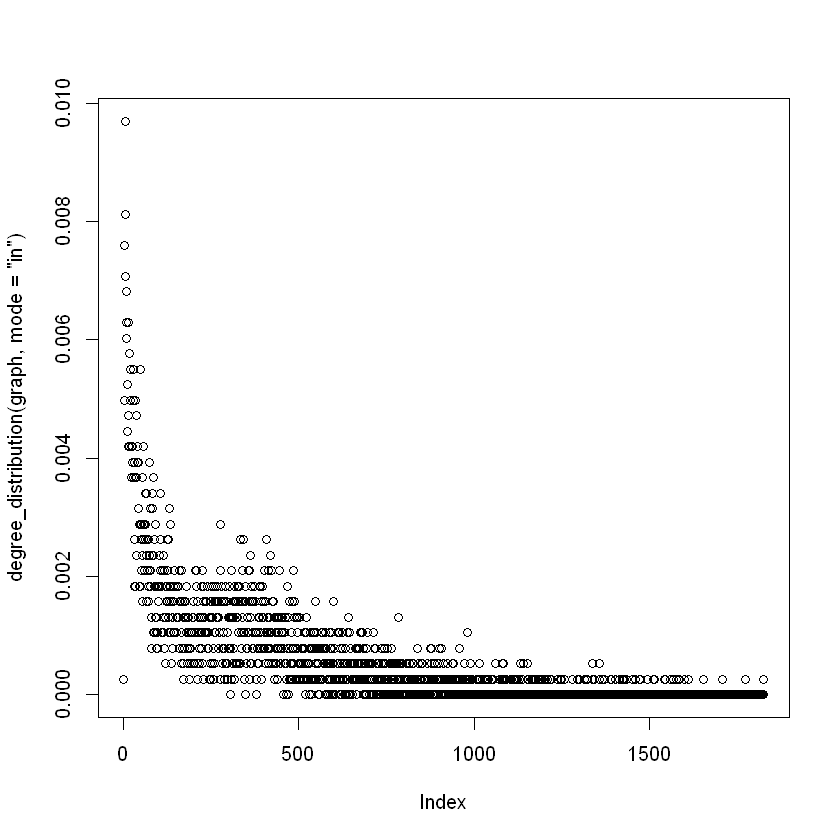

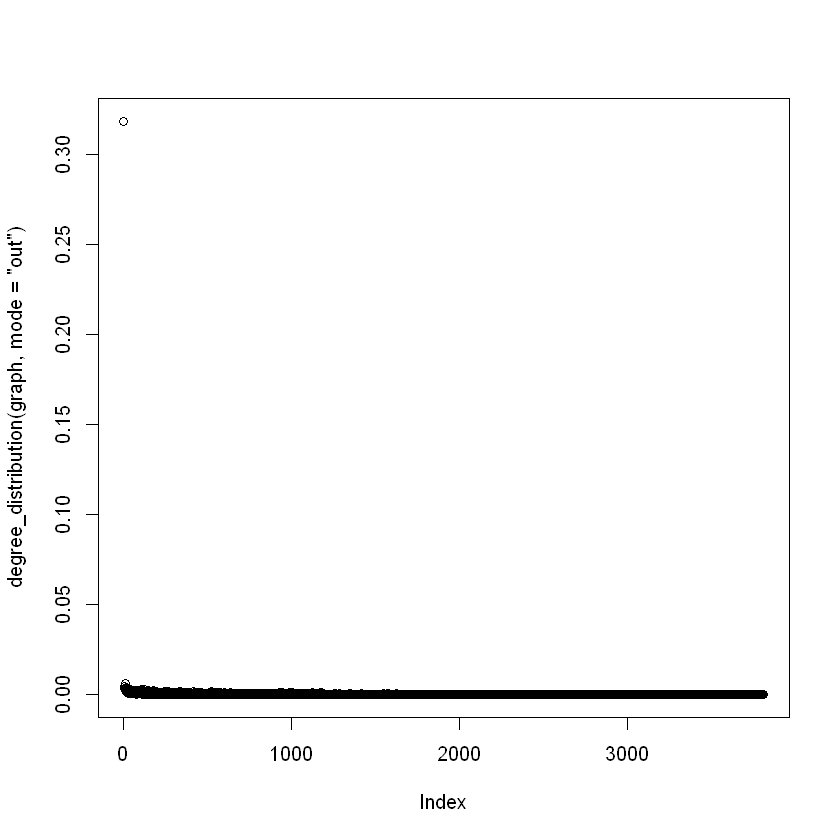

In [6]:
g <- createnet(node_id = '101373961279443806744')
distribution(g)

Question 20
---

[1] "./gplus/109327480479767108490.edges"
[1] "modularity is 0.25276535939251"


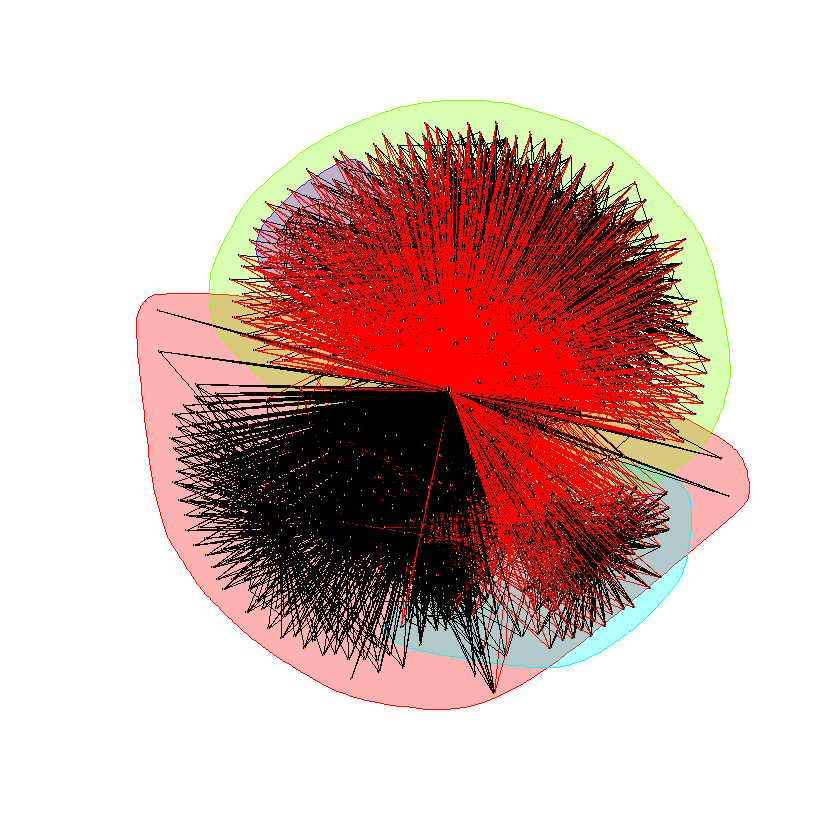

In [7]:
g1 <- createnet(node_id = '109327480479767108490')
community <- walktrap.community(g1, modularity = TRUE)
mo <- modularity(g1, membership(community))
print(paste('modularity is',mo))
plot(community, g1, edge.arrow.size=.04, vertex.size=0.5, vertex.label=NA)

[1] "./gplus/115625564993990145546.edges"
[1] "modularity is 0.319472554647349"


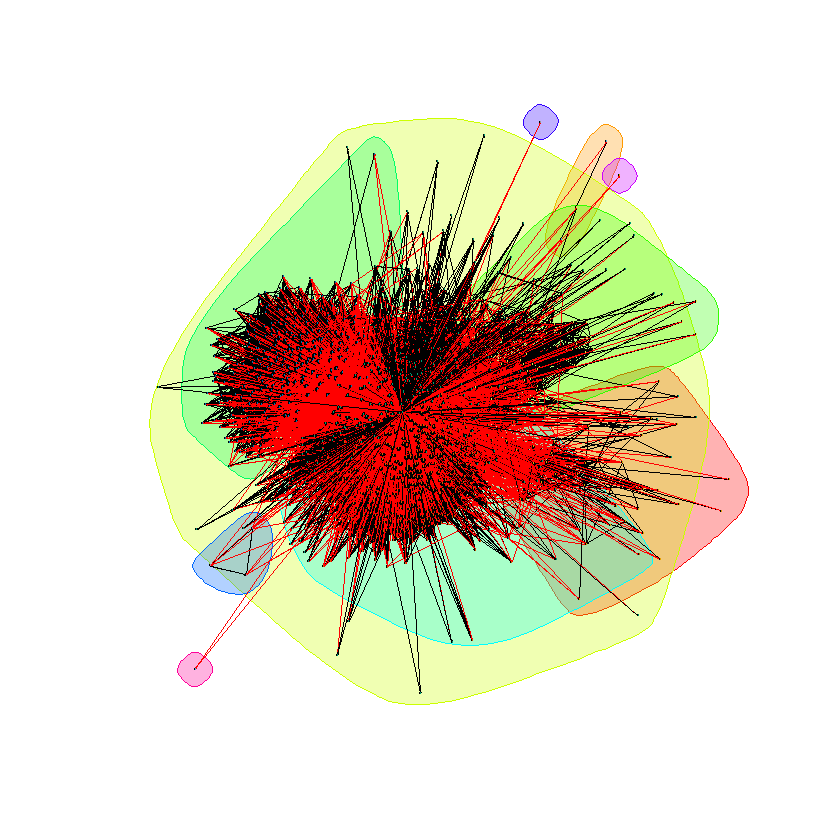

In [8]:
g2 <- createnet(node_id = '115625564993990145546')
community <- walktrap.community(g2,  modularity = TRUE)
mo <- modularity(g2, membership(community))
print(paste('modularity is',mo))
plot(community, g2, edge.arrow.size=.04, vertex.size=0.5, vertex.label=NA)

[1] "./gplus/101373961279443806744.edges"
[1] "modularity is 0.191090282684037"


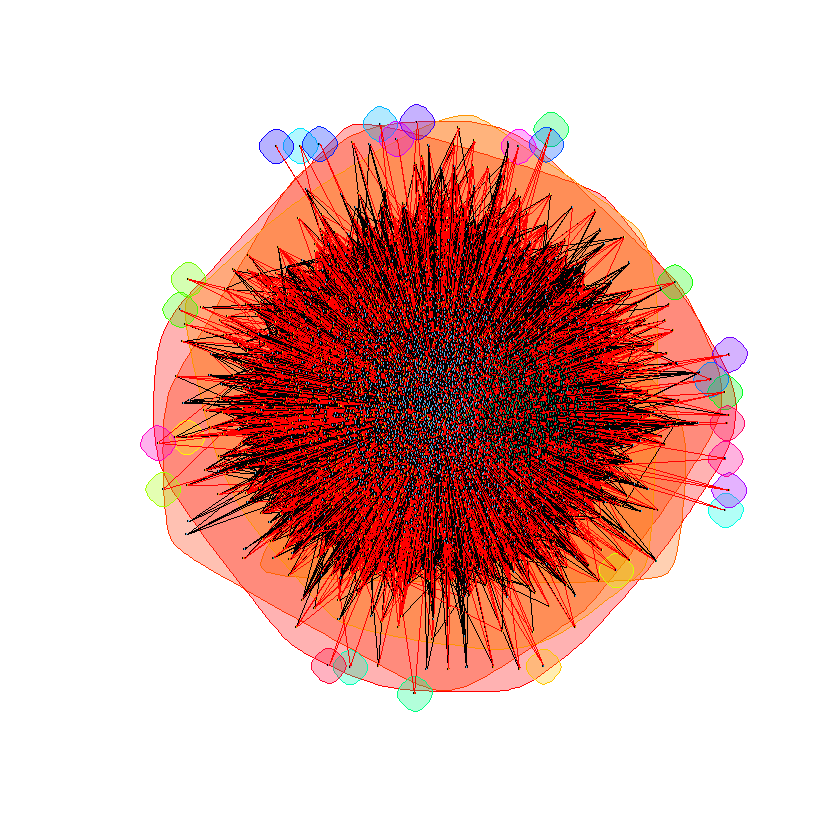

In [9]:
g3 <- createnet(node_id = '101373961279443806744')
community <- walktrap.community(g3,  modularity = TRUE)
mo <- modularity(g3, membership(community))
print(paste('modularity is',mo))
plot(community, g3, edge.arrow.size=.04, vertex.size=0.5, vertex.label=NA)